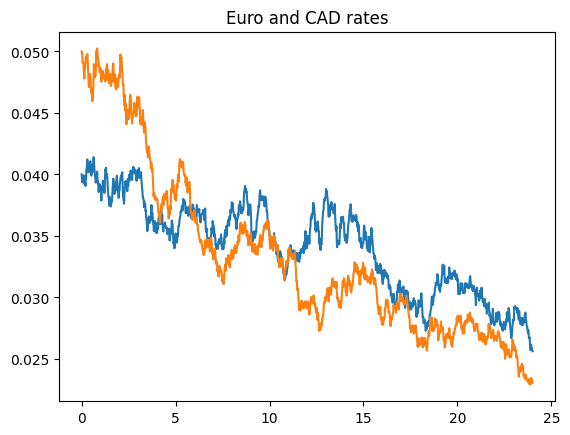

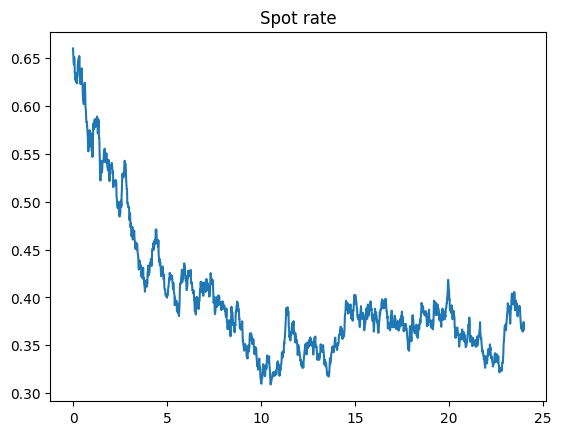

In [1]:
import math
import random
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.linalg import cholesky
import scipy.stats
import torch
import matplotlib.pyplot as plt
#Generate Brownian
def brownian_generator(length):
        brownian_motion =  [0]
        for i in range(length-1):
            brownian_motion.append(brownian_motion[-1] + torch.randn(1)/math.sqrt(252))
        return brownian_motion
#The two swap rates follow GBM, euro starts at 4%, cad starts at 5%
euro_start = 0.04
cad_start = 0.05
spot_start = 2/3
rho = 0.3
a = np.array([[1,rho, rho],[rho, 1, rho], [rho, rho, 1]])
L = cholesky(a, lower=True)
r = 0
m = 6*252
T = torch.linspace(0,24, m)
plotting =  torch.linspace(0,6*252,m)
vol = 0.15
vol_spot = 0.2
b = torch.Tensor(brownian_generator(m))
c = torch.Tensor(brownian_generator(m))
a = torch.Tensor(brownian_generator(m))
euro = euro_start*torch.exp((r-(vol*vol)/2)*T + vol*(a*L[1][0] + b*L[1][1]))
cad = cad_start*torch.exp((r-(vol*vol)/2)*T + vol*c)
spot_rate = spot_start*torch.exp(((cad - euro) - vol_spot*vol_spot/2) + vol_spot*(a*L[2][0] + b*L[2][1] + c*L[2][2]))
for i in range(499):
    euro += euro_start*torch.exp((r-(vol*vol)/2)*T + vol*(a*L[1][0] + b*L[1][1]))
euro /= 500

for i in range(499):
    cad += cad_start*torch.exp((r-(vol*vol)/2)*T + vol*a)
cad /= 500

for i in range(499):
    spot_rate += spot_start*torch.exp(((cad - euro) - vol_spot*vol_spot/2) + vol_spot*(a*L[2][0] + b*L[2][1] + c*L[2][2]))
spot_rate /= 500
plt.plot(T, euro)
plt.plot(T, cad)
plt.title("Euro and CAD rates")
fig2 = plt.figure("Figure 2")
plt.title("Spot rate")
plt.plot(T, spot_rate)